<a href="https://colab.research.google.com/github/abdulkarimshaikh2002/Data-Engineer/blob/main/ETL_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os                          # file/folder helpers
import requests                    # make HTTP requests
import pandas as pd                # dataframes and csv reader
from datetime import datetime      # handle date and time


In [ ]:
URL = "https://sdmx.data.unicef.org/ws/public/sdmxapi/rest/data/UNICEF,DM,1.0/.DM_LIFE_EXP...?format=csv"


def download_file(url,dest_folder='data'):
  #make sure destination folder exists
  os.makedirs(dest_folder, exist_ok=True)


  #create a timestamp filename(help with audit /history)
  ts = datetime.now().strftime("%Y%m%dT%H%M%SZ")
  filename = f"life_expectancy_{ts}.csv"
  filepath = os.path.join(dest_folder,filename)

  #stream download we don't hold the whole file in memory(good practise)

  with requests.get(url,stream=True,timeout= 30 ) as r:
    r.raise_for_status()              #raise an error for bad HTTP codes
    with open(filepath, "wb") as f:
      for chunk in r.iter_content(chunk_size=8192):
        if chunk:
          f.write(chunk)    #filter out keep alive chunks
  return filepath


# Now its Loading phase
def load_csv_to_df(filepath):
  # pandas will infer column types; for very large file you can use chunksize
  df = pd.read_csv(filepath)
  return df


def inspect_df(df, n=5):
    # a few useful inspection commands
    print(">>> first", n, "rows:")
    print(df.head(n))
    print("\n>>> columns and dtypes:")
    print(df.dtypes)
    print("\n>>> shape (rows, cols):", df.shape)
    print("\n>>> simple numeric summary:")
    print(df.describe(include="number"))

def main():
    print("Downloading dataset...")
    path = download_file(URL)
    print("Saved to:", path)
    df = load_csv_to_df(path)
    inspect_df(df)


if __name__ == "__main__":
      main()

Saved to: data/life_expectancy_20250912T092557Z.csv
>>> first 5 rows:
  REF_AREA Geographic area    INDICATOR        Indicator RESIDENCE Residence  \
0    WORLD           World  DM_LIFE_EXP  Life expectancy        _T     Total   
1    WORLD           World  DM_LIFE_EXP  Life expectancy        _T     Total   
2    WORLD           World  DM_LIFE_EXP  Life expectancy        _T     Total   
3    WORLD           World  DM_LIFE_EXP  Life expectancy        _T     Total   
4    WORLD           World  DM_LIFE_EXP  Life expectancy        _T     Total   

  SEX    Sex AGE Current age  ... OBS_VALUE OBS_STATUS Observation Status  \
0  _T  Total  _T       Total  ...    46.394       PRED          Predicted   
1  _T  Total  _T       Total  ...    47.126       PRED          Predicted   
2  _T  Total  _T       Total  ...    48.218       PRED          Predicted   
3  _T  Total  _T       Total  ...    48.809       PRED          Predicted   
4  _T  Total  _T       Total  ...    49.651       PRED          

In [ ]:
import pandas as pd
from datetime import datetime
import os

path = "/content/data/life_expectancy_20250912T092557Z.csv"

data = pd.read_csv(path)
print("Initial Shape:", data.shape)



Initial Shape: (67044, 29)


In [ ]:
data.head(5)

,REF_AREA,Geographic area,INDICATOR,Indicator,RESIDENCE,Residence,SEX,Sex,AGE,Current age,...,OBS_VALUE,OBS_STATUS,Observation Status,OBS_CONF,Observation confidentaility,COVERAGE_TIME,FREQ_COLL,Time interval at which the source data are collected,TIME_PERIOD_METHOD,Time period activity related to when the data are collected
0,WORLD,World,DM_LIFE_EXP,Life expectancy,_T,Total,_T,Total,_T,Total,...,46.394,PRED,Predicted,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WORLD,World,DM_LIFE_EXP,Life expectancy,_T,Total,_T,Total,_T,Total,...,47.126,PRED,Predicted,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WORLD,World,DM_LIFE_EXP,Life expectancy,_T,Total,_T,Total,_T,Total,...,48.218,PRED,Predicted,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WORLD,World,DM_LIFE_EXP,Life expectancy,_T,Total,_T,Total,_T,Total,...,48.809,PRED,Predicted,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WORLD,World,DM_LIFE_EXP,Life expectancy,_T,Total,_T,Total,_T,Total,...,49.651,PRED,Predicted,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['REF_AREA', 'Geographic area', 'INDICATOR', 'Indicator', 'RESIDENCE',
       'Residence', 'SEX', 'Sex', 'AGE', 'Current age', 'DATA_SOURCE',
       'UNIT_MEASURE', 'Unit of measure', 'UNIT_MULTIPLIER', 'Unit multiplier',
       'SOURCE_LINK', 'SERIES_FOOTNOTE', 'OBS_FOOTNOTE', 'TIME_PERIOD',
       'OBS_VALUE', 'OBS_STATUS', 'Observation Status', 'OBS_CONF',
       'Observation confidentaility', 'COVERAGE_TIME', 'FREQ_COLL',
       'Time interval at which the source data are collected',
       'TIME_PERIOD_METHOD',
       'Time period activity related to when the data are collected'],
      dtype='object')

In [ ]:
data.columns = [c.strip().lower().replace(" ","_")for c in data.columns]

print("After cleaning columns:")
data.columns.tolist()

After cleaning columns:


['ref_area',
 'geographic_area',
 'indicator',
 'indicator',
 'residence',
 'residence',
 'sex',
 'sex',
 'age',
 'current_age',
 'data_source',
 'unit_measure',
 'unit_of_measure',
 'unit_multiplier',
 'unit_multiplier',
 'source_link',
 'series_footnote',
 'obs_footnote',
 'time_period',
 'obs_value',
 'obs_status',
 'observation_status',
 'obs_conf',
 'observation_confidentaility',
 'coverage_time',
 'freq_coll',
 'time_interval_at_which_the_source_data_are_collected',
 'time_period_method',
 'time_period_activity_related_to_when_the_data_are_collected']

In [ ]:
#drop less useful columns

data = data.drop(columns = [
    "indicator", "residence", "sex", "current_age",
    "unit_of_measure", "unit_multiplier",
    "observation_status", "observation_confidentaility",
    "time_interval_at_which_the_source_data_are_collected",
    "time_period_activity_related_to_when_the_data_are_collected"
], errors= "ignore")

print("Shape after dropping duplicates:", data.shape)
print("Remaining columns:")
print(data.columns.tolist())

Shape after dropping duplicates: (67044, 15)
Remaining columns:
['ref_area', 'geographic_area', 'age', 'data_source', 'unit_measure', 'source_link', 'series_footnote', 'obs_footnote', 'time_period', 'obs_value', 'obs_status', 'obs_conf', 'coverage_time', 'freq_coll', 'time_period_method']


In [ ]:
data[["geographic_area","time_period","obs_value"]].head(10)

,geographic_area,time_period,obs_value
0,World,1950,46.394
1,World,1951,47.126
2,World,1952,48.218
3,World,1953,48.809
4,World,1954,49.651
5,World,1955,50.206
6,World,1956,50.737
7,World,1957,51.064
8,World,1958,51.615
9,World,1959,49.582


In [ ]:
print("Missing Values per columns:")
print(data[["geographic_area","time_period","obs_value"]].isna().sum())

print("\n Duplicate rows:",data.duplicated().sum())

Missing Values per columns:
geographic_area    0
time_period        0
obs_value          0
dtype: int64

 Duplicate rows: 0


In [ ]:
os.makedirs("/content/staging",exist_ok=True)

ts = datetime.now().strftime("%Y%m%dT%H%M%SZ")
out_path = f"/content/staging/life_expectancy_staging_{ts}.parquet" # Use f-string for formatting

data.to_parquet(out_path, index =False)

print("Saved parquet file to :",out_path)

Saved parquet file to : /content/staging/life_expectancy_staging_20250912T092650Z.parquet


In [ ]:
check = pd.read_parquet(out_path)
print("Reloaded shape:", check.shape)
print(check.head(3))


Reloaded shape: (67044, 15)
  ref_area geographic_area age  \
0    WORLD           World  _T   
1    WORLD           World  _T   
2    WORLD           World  _T   

                                         data_source unit_measure  \
0  United Nations, Department of Economic and Soc...           YR   
1  United Nations, Department of Economic and Soc...           YR   
2  United Nations, Department of Economic and Soc...           YR   

                      source_link  series_footnote  obs_footnote  time_period  \
0  https://population.un.org/wpp/              NaN           NaN         1950   
1  https://population.un.org/wpp/              NaN           NaN         1951   
2  https://population.un.org/wpp/              NaN           NaN         1952   

   obs_value obs_status  obs_conf  coverage_time  freq_coll  \
0     46.394       PRED       NaN            NaN        NaN   
1     47.126       PRED       NaN            NaN        NaN   
2     48.218       PRED       NaN           

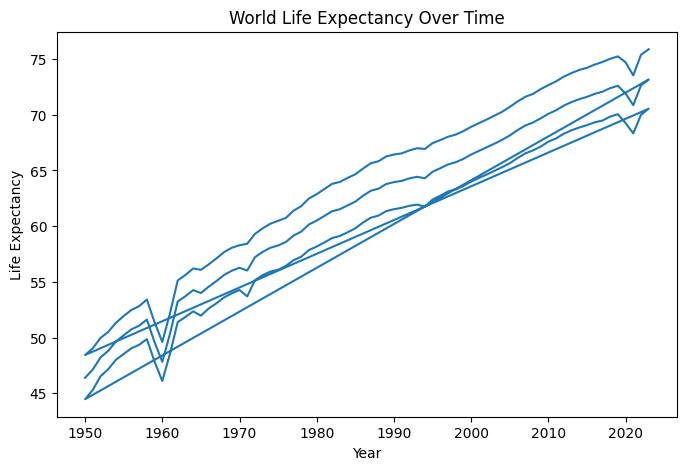

In [ ]:
import matplotlib.pyplot as plt

world = check[check["geographic_area"] == "World"]

plt.figure(figsize=(8,5))
plt.plot(world["time_period"], world["obs_value"])
plt.title("World Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.show()


In [ ]:
pop_url = "https://raw.githubusercontent.com/datasets/population/master/data/population.csv"
population = pd.read_csv(pop_url)

print("Population shape:", population.shape)
print(population.head())


Population shape: (16930, 4)
  Country Name Country Code  Year    Value
0        Aruba          ABW  1960  54922.0
1        Aruba          ABW  1961  55578.0
2        Aruba          ABW  1962  56320.0
3        Aruba          ABW  1963  57002.0
4        Aruba          ABW  1964  57619.0


In [ ]:
population = population.rename(columns={
    "Country Name": "geographic_area",
    "Country Code": "ref_area",
    "Year": "time_period",
    "Value": "population"
})

print(population.head(3))

  geographic_area ref_area  time_period  population
0           Aruba      ABW         1960     54922.0
1           Aruba      ABW         1961     55578.0
2           Aruba      ABW         1962     56320.0


In [ ]:
combined = pd.merge(
    data, population,
    on=["geographic_area", "time_period"],
    how="outer",   # outer join keeps everything, shows NaN where no match
    indicator=True
)

# Count how many matched vs not matched
print(combined["_merge"].value_counts())

# Show some examples that didn’t match
print(combined[combined["_merge"] != "both"][["geographic_area", "time_period", "_merge"]].head(20))


_merge
both          35712
left_only     31332
right_only     5026
Name: count, dtype: int64
   geographic_area  time_period     _merge
0      Afghanistan         1950  left_only
1      Afghanistan         1950  left_only
2      Afghanistan         1950  left_only
3      Afghanistan         1951  left_only
4      Afghanistan         1951  left_only
5      Afghanistan         1951  left_only
6      Afghanistan         1952  left_only
7      Afghanistan         1952  left_only
8      Afghanistan         1952  left_only
9      Afghanistan         1953  left_only
10     Afghanistan         1953  left_only
11     Afghanistan         1953  left_only
12     Afghanistan         1954  left_only
13     Afghanistan         1954  left_only
14     Afghanistan         1954  left_only
15     Afghanistan         1955  left_only
16     Afghanistan         1955  left_only
17     Afghanistan         1955  left_only
18     Afghanistan         1956  left_only
19     Afghanistan         1956  left_only


In [ ]:
# Make sure both datasets use the same key: ISO3 code
life = data.rename(columns={"ref_area": "iso3"})
pop = population.rename(columns={"ref_area": "iso3"})

combined = pd.merge(
    life, pop,
    on=["iso3", "time_period"],
    how="inner"
)

print("Shape after ISO3 merge:", combined.shape)
print(combined.head(10))


Shape after ISO3 merge: (41382, 17)
  iso3 geographic_area_x age  \
0  BDI           Burundi  _T   
1  BDI           Burundi  _T   
2  BDI           Burundi  _T   
3  BDI           Burundi  _T   
4  BDI           Burundi  _T   
5  BDI           Burundi  _T   
6  BDI           Burundi  _T   
7  BDI           Burundi  _T   
8  BDI           Burundi  _T   
9  BDI           Burundi  _T   

                                         data_source unit_measure  \
0  United Nations, Department of Economic and Soc...           YR   
1  United Nations, Department of Economic and Soc...           YR   
2  United Nations, Department of Economic and Soc...           YR   
3  United Nations, Department of Economic and Soc...           YR   
4  United Nations, Department of Economic and Soc...           YR   
5  United Nations, Department of Economic and Soc...           YR   
6  United Nations, Department of Economic and Soc...           YR   
7  United Nations, Department of Economic and Soc...       

In [ ]:
combined_clean = combined[[
    "iso3",
    "geographic_area_x",  # keep the UNICEF country name
    "time_period",
    "obs_value",          # life expectancy
    "population"          # from World Bank
]]

# Rename for clarity
combined_clean = combined_clean.rename(columns={
    "geographic_area_x": "country",
    "obs_value": "life_expectancy"
})

print(combined_clean.head(10))


  iso3  country  time_period  life_expectancy  population
0  BDI  Burundi         1960           43.262   2764258.0
1  BDI  Burundi         1961           43.364   2835119.0
2  BDI  Burundi         1962           43.492   2907943.0
3  BDI  Burundi         1963           43.559   2969841.0
4  BDI  Burundi         1964           43.601   3055650.0
5  BDI  Burundi         1965           41.844   3141367.0
6  BDI  Burundi         1966           43.529   3217960.0
7  BDI  Burundi         1967           43.332   3300690.0
8  BDI  Burundi         1968           43.405   3380387.0
9  BDI  Burundi         1969           43.000   3454590.0


In [ ]:
combined_clean["life_years_total"] = (
    combined_clean["life_expectancy"] * combined_clean["population"]
)

print(combined_clean.head(5))


  iso3  country  time_period  life_expectancy  population  life_years_total
0  BDI  Burundi         1960           43.262   2764258.0      1.195873e+08
1  BDI  Burundi         1961           43.364   2835119.0      1.229421e+08
2  BDI  Burundi         1962           43.492   2907943.0      1.264723e+08
3  BDI  Burundi         1963           43.559   2969841.0      1.293633e+08
4  BDI  Burundi         1964           43.601   3055650.0      1.332294e+08


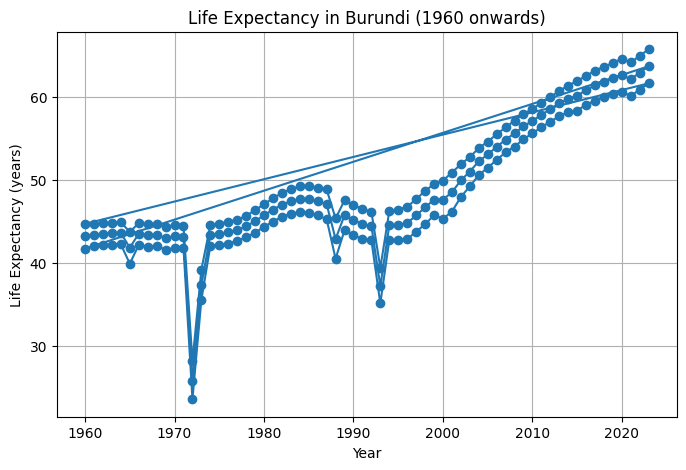

In [ ]:
import matplotlib.pyplot as plt

# Filter for Burundi
burundi = combined_clean[combined_clean["country"] == "Burundi"]

# Plot
plt.figure(figsize=(8,5))
plt.plot(burundi["time_period"], burundi["life_expectancy"], marker="o")

plt.title("Life Expectancy in Burundi (1960 onwards)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.grid(True)
plt.show()


In [ ]:
# Create a decade column
combined_clean["decade"] = (combined_clean["time_period"] // 10) * 10

# Average life expectancy per country per decade
country_decade = (
    combined_clean.groupby(["country", "decade"])
    .agg(avg_life_exp=("life_expectancy", "mean"))
    .reset_index()
)

print(country_decade.head(10))


       country  decade  avg_life_exp
0  Afghanistan    1960     34.925133
1  Afghanistan    1970     39.313867
2  Afghanistan    1980     38.178933
3  Afghanistan    1990     50.463867
4  Afghanistan    2000     57.739933
5  Afghanistan    2010     62.100000
6  Afghanistan    2020     63.412083
7      Albania    1960     60.719200
8      Albania    1970     67.741600
9      Albania    1980     71.250833


   time_period  world_avg_life
0         1960       54.925678
1         1961       55.402057
2         1962       55.850619
3         1963       56.229515
4         1964       56.730541


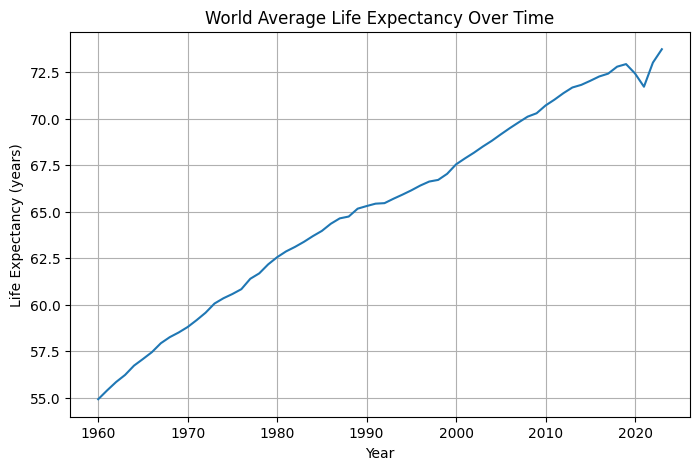

In [ ]:
world_yearly = (
    combined_clean.groupby("time_period")
    .agg(world_avg_life=("life_expectancy", "mean"))
    .reset_index()
)

print(world_yearly.head())

plt.figure(figsize=(8,5))
plt.plot(world_yearly["time_period"], world_yearly["world_avg_life"])
plt.title("World Average Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.grid(True)
plt.show()



In [ ]:
# Add a "decade" column
combined_clean["decade"] = (combined_clean["time_period"] // 10) * 10

# Group by country + decade
country_decade = (
    combined_clean.groupby(["country", "decade"])
    .agg(avg_life_exp=("life_expectancy", "mean"))
    .reset_index()
)

print("Shape:", country_decade.shape)
print(country_decade.head(10))


Shape: (1509, 3)
       country  decade  avg_life_exp
0  Afghanistan    1960     34.925133
1  Afghanistan    1970     39.313867
2  Afghanistan    1980     38.178933
3  Afghanistan    1990     50.463867
4  Afghanistan    2000     57.739933
5  Afghanistan    2010     62.100000
6  Afghanistan    2020     63.412083
7      Albania    1960     60.719200
8      Albania    1970     67.741600
9      Albania    1980     71.250833


In [ ]:
world_yearly = (
    combined_clean.groupby("time_period")
    .agg(world_avg_life=("life_expectancy", "mean"))
    .reset_index()
)

print("Shape:", world_yearly.shape)
print(world_yearly.head())


Shape: (64, 2)
   time_period  world_avg_life
0         1960       54.925678
1         1961       55.402057
2         1962       55.850619
3         1963       56.229515
4         1964       56.730541


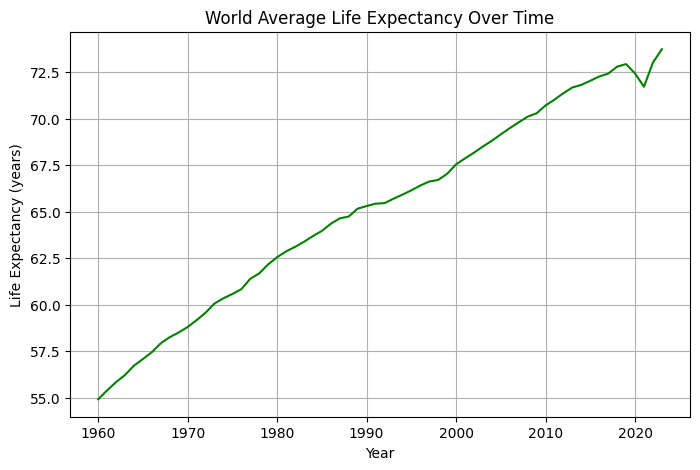

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(world_yearly["time_period"], world_yearly["world_avg_life"], color="green")

plt.title("World Average Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.grid(True)
plt.show()


In [ ]:
!pip install pycountry-convert --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 16.5 MB/s eta 0:00:00


In [ ]:
import pycountry_convert as pc


In [ ]:
def iso3_to_continent(iso3):
    try:
        alpha2 = pc.country_alpha3_to_country_alpha2(iso3)
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        continent_map = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania"
        }
        return continent_map.get(continent_code, None)
    except:
        return None


In [ ]:
combined_clean["continent"] = combined_clean["iso3"].apply(iso3_to_continent)
print(combined_clean[["iso3", "country", "continent"]].head(10))


  iso3  country continent
0  BDI  Burundi    Africa
1  BDI  Burundi    Africa
2  BDI  Burundi    Africa
3  BDI  Burundi    Africa
4  BDI  Burundi    Africa
5  BDI  Burundi    Africa
6  BDI  Burundi    Africa
7  BDI  Burundi    Africa
8  BDI  Burundi    Africa
9  BDI  Burundi    Africa


In [ ]:
continent_yearly = (
    combined_clean.groupby(["continent", "time_period"])
    .agg(avg_life_exp=("life_expectancy", "mean"))
    .reset_index()
)

print(continent_yearly.head(10))


  continent  time_period  avg_life_exp
0    Africa         1960     42.686198
1    Africa         1961     43.107272
2    Africa         1962     43.647420
3    Africa         1963     44.008710
4    Africa         1964     44.523037
5    Africa         1965     44.838043
6    Africa         1966     45.114821
7    Africa         1967     45.555914
8    Africa         1968     45.981994
9    Africa         1969     46.090951


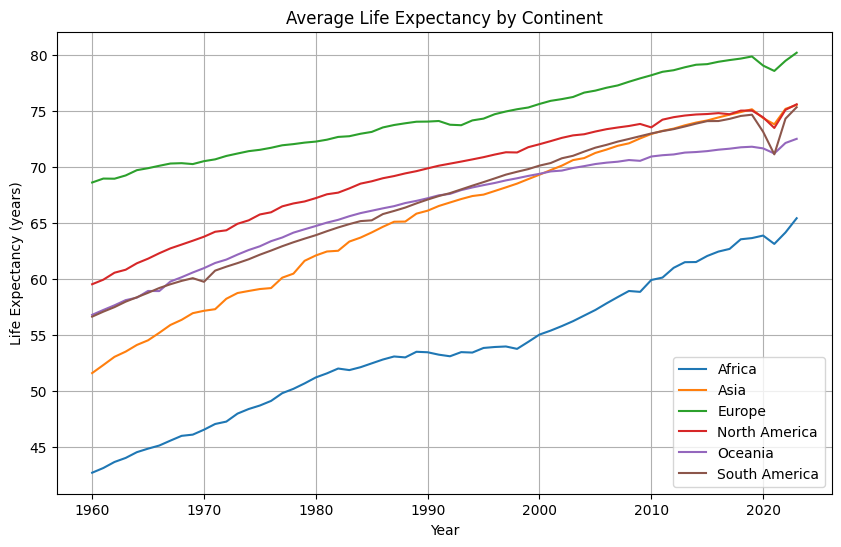

In [ ]:
plt.figure(figsize=(10,6))

for cont in continent_yearly["continent"].dropna().unique():
    subset = continent_yearly[continent_yearly["continent"] == cont]
    plt.plot(subset["time_period"], subset["avg_life_exp"], label=cont)

plt.title("Average Life Expectancy by Continent")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.legend()
plt.grid(True)
plt.show()
